In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# MNIST dataset with Pytorch

In [2]:
# create train and test data set as Tensors
train_dataset = dsets.MNIST(root = './data',train = True,transform = transforms.ToTensor(),download = True)
test_dataset = dsets.MNIST(root = './data',train = False ,transform = transforms.ToTensor())

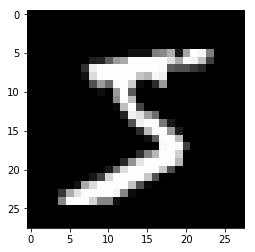

In [3]:
# example image
sample_image = torch.Tensor.numpy(train_dataset[0][0][0])
plt.imshow(np.reshape(sample_image, [28,28]),cmap ='gray')
plt.show()

In [4]:
# define parameters of NN
input_size = 784
hidden_size = 200
num_classes = 10
num_epochs = 10
batch_size = 2000
learning_rate = 0.01

In [5]:
# load dataset using data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [6]:
import torch.nn.functional as F
import torch.optim as optim

In [7]:
class NetLinear(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(NetLinear, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)     
                
    def forward(self, x):    
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)

In [8]:
class NetTanh(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)        
        
        
    def forward(self, x):    
        x = x.view(-1, 28*28)
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)

In [9]:
class NetSigmoid(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(NetSigmoid, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)
               
        
    def forward(self, x):    
        x = x.view(-1, 28*28)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)

In [10]:
class NetReLu(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(NetReLu, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)        
        
        
    def forward(self, x):    
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)

In [11]:
# loss function
criterion = nn.CrossEntropyLoss()

We also want to test our different nets on the test set. So you need to write a test function for the test set:

In [12]:
def test(network):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += criterion(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    
#     print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))

    accuracy = correct.item() / len(test_loader.dataset)
#     print("correct: ", correct*1.0 , " length: ", len(test_loader.dataset), " ratio: ", correct.item()/len(test_loader.dataset))
    return accuracy



In [13]:
%matplotlib inline 
class Plot:
    def __init__(self, initial_test_function_value):
        self.accuracy = [initial_test_function_value]
        self.loss = [0]
        self.x_axis = [0]
    
    def append_loss(self, loss):
        self.loss.append(loss)
        
    def append_accuracy(self, accuracy):
        self.accuracy.append(accuracy)
        
    def append_x_axis(self, x_axis):
        self.x_axis.append(x_axis)
        
    def plot(self):      
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('epochs')
        ax1.set_ylabel('accuracy', color=color)
        ax1.plot(self.x_axis, self.accuracy, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax2.set_ylabel('loss', color=color)
        ax2.plot(self.x_axis, self.loss, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()
        plt.show()

In [14]:
# initialize linear net and optimizer

network_linear = NetLinear(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_linear.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_linear)

plot_linear = Plot(init_test)

def train(epoch):
    network_linear.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_linear(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_linear.append_loss(loss.item())
    plot_linear.append_x_axis(epoch)
            

      

In [15]:
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_linear)
    plot_linear.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 1.465864
Train Epoch: 2 	Loss: 0.825790
Train Epoch: 3 	Loss: 0.582944
Train Epoch: 4 	Loss: 0.540600
Train Epoch: 5 	Loss: 0.465907
Train Epoch: 6 	Loss: 0.431353
Train Epoch: 7 	Loss: 0.420047
Train Epoch: 8 	Loss: 0.439428
Train Epoch: 9 	Loss: 0.377007
Train Epoch: 10 	Loss: 0.432244


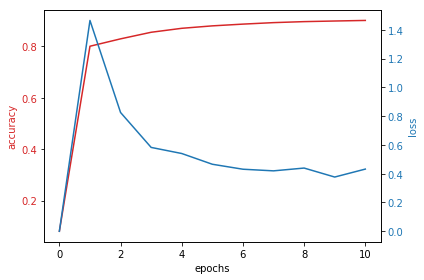

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 11
[0.0809, 0.8005, 0.8292, 0.8548, 0.8702, 0.8797, 0.8865, 0.8923, 0.8962, 0.8986, 0.9008] 11
[0, 1.4658641815185547, 0.8257902264595032, 0.5829441547393799, 0.5406002998352051, 0.46590715646743774, 0.43135327100753784, 0.4200468063354492, 0.43942779302597046, 0.3770071268081665, 0.43224388360977173] 11


In [16]:
plot_linear.plot()
print(plot_linear.x_axis, len(plot_linear.x_axis))
print(plot_linear.accuracy, len(plot_linear.accuracy))
print(plot_linear.loss, len(plot_linear.loss))

In [17]:
# initialize tanh net and optimizer

network_tanh = NetTanh(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_tanh.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_tanh)

plot_tanh = Plot(init_test)

def train(epoch):
    network_tanh.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_tanh(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_tanh.append_loss(loss.item())
    plot_tanh.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_tanh)
    plot_tanh.append_accuracy(accuracy)
            

Train Epoch: 1 	Loss: 1.534895
Train Epoch: 2 	Loss: 0.877957
Train Epoch: 3 	Loss: 0.685972
Train Epoch: 4 	Loss: 0.557465
Train Epoch: 5 	Loss: 0.507166
Train Epoch: 6 	Loss: 0.442079
Train Epoch: 7 	Loss: 0.428084
Train Epoch: 8 	Loss: 0.400402
Train Epoch: 9 	Loss: 0.410611
Train Epoch: 10 	Loss: 0.381891


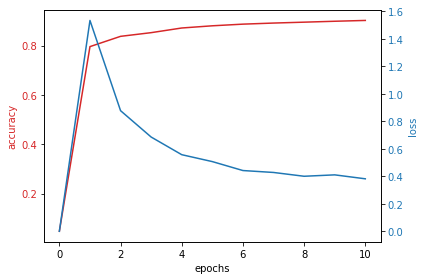

In [18]:
plot_tanh.plot()

In [19]:
# initialize sigmoid net and optimizer
network_sigmoid = NetSigmoid(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_sigmoid.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_sigmoid)

plot_sigmoid = Plot(init_test)

def train(epoch):
    network_sigmoid.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_sigmoid(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_sigmoid.append_loss(loss.item())
    plot_sigmoid.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_sigmoid)
    plot_sigmoid.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 2.240768
Train Epoch: 2 	Loss: 2.152308
Train Epoch: 3 	Loss: 2.019782
Train Epoch: 4 	Loss: 1.844389
Train Epoch: 5 	Loss: 1.646601
Train Epoch: 6 	Loss: 1.436415
Train Epoch: 7 	Loss: 1.238711
Train Epoch: 8 	Loss: 1.100244
Train Epoch: 9 	Loss: 1.016742
Train Epoch: 10 	Loss: 0.921345


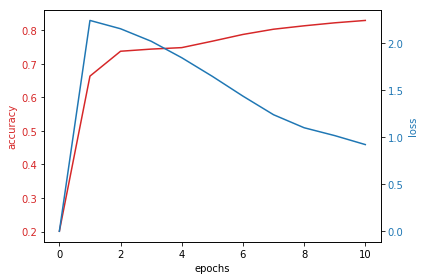

In [20]:
plot_sigmoid.plot()

In [21]:
# initialize relu net and optimizer
network_relu = NetReLu(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_relu.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_relu)

plot_relu = Plot(init_test)

def train(epoch):
    network_relu.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_relu(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_relu.append_loss(loss.item())
    plot_relu.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_relu)
    plot_relu.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 1.799467
Train Epoch: 2 	Loss: 1.001109
Train Epoch: 3 	Loss: 0.708797
Train Epoch: 4 	Loss: 0.589033
Train Epoch: 5 	Loss: 0.508968
Train Epoch: 6 	Loss: 0.436236
Train Epoch: 7 	Loss: 0.444048
Train Epoch: 8 	Loss: 0.430001
Train Epoch: 9 	Loss: 0.364693
Train Epoch: 10 	Loss: 0.383278


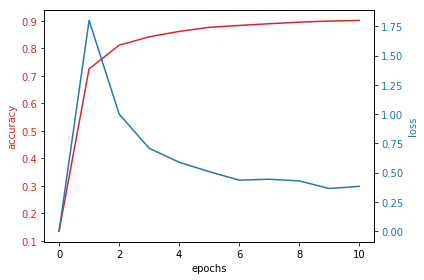

In [22]:
plot_relu.plot()

In [23]:
# L2 Reguralization 
class NetLinearReg(NetLinear):
    def regTerm(self, lmbda):
        l1 = lmbda*torch.sum(self.fc1.weight**2)/(2*len(self.fc1.weight))
        l2 = lmbda*torch.sum(self.fc2.weight**2)/(2*len(self.fc2.weight))
    #     print(l1+l2)
        return l1+l2



In [24]:
# training
lmbda = 10
network_linear = NetLinearReg(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_linear.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_linear)

plot_linear = Plot(init_test)

def train(epoch):
    network_linear.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_linear(data)
        loss = criterion(output, target) + network_linear.regTerm(lmbda)
#         print(loss)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_linear.append_loss(loss.item())
    plot_linear.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_linear)
    plot_linear.append_accuracy(accuracy)
    

Train Epoch: 1 	Loss: 3.619213
Train Epoch: 2 	Loss: 3.168212
Train Epoch: 3 	Loss: 2.830160
Train Epoch: 4 	Loss: 2.606313
Train Epoch: 5 	Loss: 2.416253
Train Epoch: 6 	Loss: 2.301103
Train Epoch: 7 	Loss: 2.225227
Train Epoch: 8 	Loss: 2.136199
Train Epoch: 9 	Loss: 2.101537
Train Epoch: 10 	Loss: 2.080554


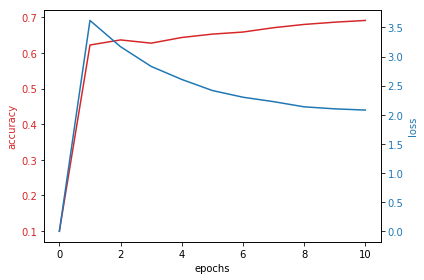

In [25]:
plot_linear.plot()

#### L1 Regularization
It is similar to L2 regularization but the regularization term looks different:
\begin{eqnarray}  C = C_0 + \frac{\lambda}{n} \sum_w |w|.\end{eqnarray}
Implement this regularization type in one of your NNs!

In [26]:
# L1 Regularization 
class NetSigmoidReg(NetSigmoid):
    def regTerm(self, lmbda):
        l1 = lmbda*torch.sum(self.fc1.weight.norm())/(2*len(self.fc1.weight))
        l2 = lmbda*torch.sum(self.fc2.weight.norm())/(2*len(self.fc2.weight))
    #     print(l1+l2)
        return l1+l2


In [27]:
# training
# initialize net and optimizer
lmbda = 1
network_sigmoid = NetSigmoidReg(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_sigmoid.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_sigmoid)

plot_sigmoid = Plot(init_test)

def train(epoch):
    network_sigmoid.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_sigmoid(data)
        loss = criterion(output, target)+network_sigmoid.regTerm(lmbda)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_sigmoid.append_loss(loss.item())
    plot_sigmoid.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_sigmoid)
    plot_sigmoid.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 2.360613
Train Epoch: 2 	Loss: 2.287581
Train Epoch: 3 	Loss: 2.193028
Train Epoch: 4 	Loss: 2.080375
Train Epoch: 5 	Loss: 1.944739
Train Epoch: 6 	Loss: 1.779919
Train Epoch: 7 	Loss: 1.644908
Train Epoch: 8 	Loss: 1.508609
Train Epoch: 9 	Loss: 1.412334
Train Epoch: 10 	Loss: 1.310230


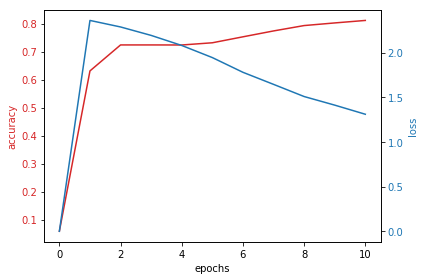

In [28]:
plot_sigmoid.plot()

#### Max norm constraints
This regularization has another approach to regularize the weights. The idea is to disallow the weight become bigger than a pre-specified parameter.
\begin{eqnarray}\Vert \vec{w} \Vert_2 < c\end{eqnarray}
If weights do not satisfy this condition, they are projected back into the ball with radius $c$.

In [35]:
# Max Norm Constraints
class NetTanhReg(NetTanh):
    def max_norm(self, max_norm):
        l1_norm = torch.sum(self.fc1.weight.norm())
        l2_norm = torch.sum(self.fc1.weight.norm())
        desired_l1 = torch.clamp(l1_norm, max=max_norm)
        desired_l2 = torch.clamp(l2_norm, max=max_norm)
        
        self.fc1.weight = torch.nn.Parameter(self.fc1.weight*desired_l1/l1_norm)
        self.fc2.weight = torch.nn.Parameter(self.fc2.weight*desired_l2/l2_norm)
#         print(torch.sum(self.fc1.weight.norm()))
#         print(torch.sum(self.fc1.weight.norm()))

        


In [41]:
# training

mnorm= 7

network_tanh = NetTanhReg(input_size, hidden_size, num_classes)

optimizer = optim.SGD(network_tanh.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_tanh)

plot_tanh = Plot(init_test)

def train(epoch):
    network_tanh.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_tanh(data)
        loss = criterion(output, target)
        network_tanh.max_norm(mnorm)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_tanh.append_loss(loss.item())
    plot_tanh.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_tanh)
    plot_tanh.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 2.308188
Train Epoch: 2 	Loss: 2.307981
Train Epoch: 3 	Loss: 2.310464
Train Epoch: 4 	Loss: 2.311085
Train Epoch: 5 	Loss: 2.306372
Train Epoch: 6 	Loss: 2.309491
Train Epoch: 7 	Loss: 2.308923
Train Epoch: 8 	Loss: 2.309581
Train Epoch: 9 	Loss: 2.308315
Train Epoch: 10 	Loss: 2.308419


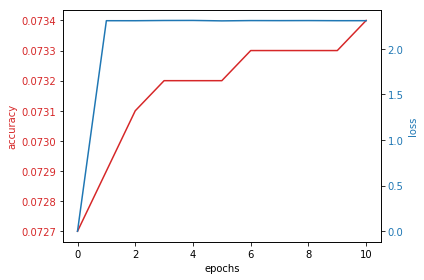

In [42]:
plot_tanh.plot()

In [32]:
#Dropout
class NetReLuReg(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(NetReLuReg, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)        
        
        
    def forward(self, x):    
        x = x.view(-1, 28*28)
        x = F.dropout(torch.relu(self.fc1(x)), p=self.p)
        x = self.fc2(x)
        return F.log_softmax(x, dim=0)
    
    def setDropoutP(self, p):
        self.p = p
        

In [33]:
# training
dropout_p = 0.5

network_relu = NetReLuReg(input_size, hidden_size, num_classes)
network_relu.setDropoutP(dropout_p)

optimizer = optim.SGD(network_relu.parameters(), lr=learning_rate, momentum=0.9)

init_test = test(network_relu)

plot_relu = Plot(init_test)

def train(epoch):
    network_relu.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network_relu(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))
        
    plot_relu.append_loss(loss.item())
    plot_relu.append_x_axis(epoch)
    
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy = test(network_relu)
    plot_relu.append_accuracy(accuracy)

Train Epoch: 1 	Loss: 1.877778
Train Epoch: 2 	Loss: 1.054712
Train Epoch: 3 	Loss: 0.698848
Train Epoch: 4 	Loss: 0.592552
Train Epoch: 5 	Loss: 0.530918
Train Epoch: 6 	Loss: 0.470920
Train Epoch: 7 	Loss: 0.446212
Train Epoch: 8 	Loss: 0.410480
Train Epoch: 9 	Loss: 0.408119
Train Epoch: 10 	Loss: 0.396868


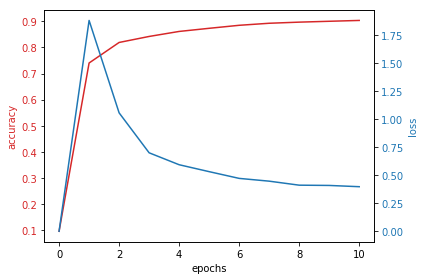

In [34]:
plot_relu.plot()